In [1]:
import sys
sys.path.insert(0, '/Users/xihehan/eic-project/regressiononly/functions')
sys.path.insert(0, '/Users/xihehan/eic-project/regressiononly/training')

In [2]:
from plotting import *
from data_functions import *
import pandas as pd
import numpy as np 
import compress_pickle as pickle
time_TH = 150
MIP  = 0.0006 ## GeV
MIP_TH = 0.5 * MIP 

/Users/xihehan/anaconda3/envs/bhcal/lib/python3.9/site-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):



Using variable strings ['E', 'X', 'Y', 'Z'] from binning_utils.py



# Plotting Loss(MAE)

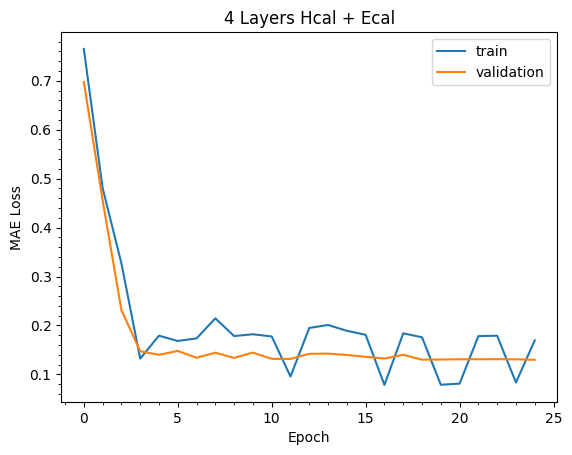

In [3]:
num_repetation = 1
latent_sizes = 64
learning_rates = 'e3'
num_layers = 4
input_dims = '4D'
particles = 'pp'
error_types = 'mse'

result_paths = "/Users/xihehan/eic-project/regressiononly/training/"


npz_unpacked_loss = np.load(result_paths+"losses.npz")
loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']

figure = plt.subplot()
figure.plot(loss[:,-1],label="train")
figure.plot(val_loss[:,-1],label="validation")
figure.minorticks_on()
figure.set_xlabel("Epoch", fontsize=10)
figure.set_ylabel("MAE Loss",fontsize=10)
figure.set_title("4 Layers Hcal + Ecal")
figure.legend(loc='upper right', fontsize=10)




# Plotting Energy Prediction


In [4]:

npz_unpacked_prediction = np.load(result_paths+"predictions.npz")
predictions_arr = npz_unpacked_prediction['outputs']
targets_arr = npz_unpacked_prediction['targets']

means = pickle.load(open("/Users/xihehan/eic-project/regressiononly/training/means.p", 'rb'), compression='gzip')
stdvs = pickle.load(open("/Users/xihehan/eic-project/regressiononly/training/stdvs.p", 'rb'), compression='gzip')

print(means.keys())

targets_ene = targets_arr * stdvs['genP'] + means['genP']

prediction_ene = predictions_arr*stdvs['genP'] + means['genP']

targets_ene = 10 ** targets_ene
prediction_ene = 10 ** prediction_ene

ClusterSum = prediction_ene
GenP = targets_ene


dict_keys(['HcalEndcapPHitsReco.energy', '.position.z', '.position.x', '.position.y', 'clusterE', 'genP', 'EcalEndcapPHitsReco.energy'])


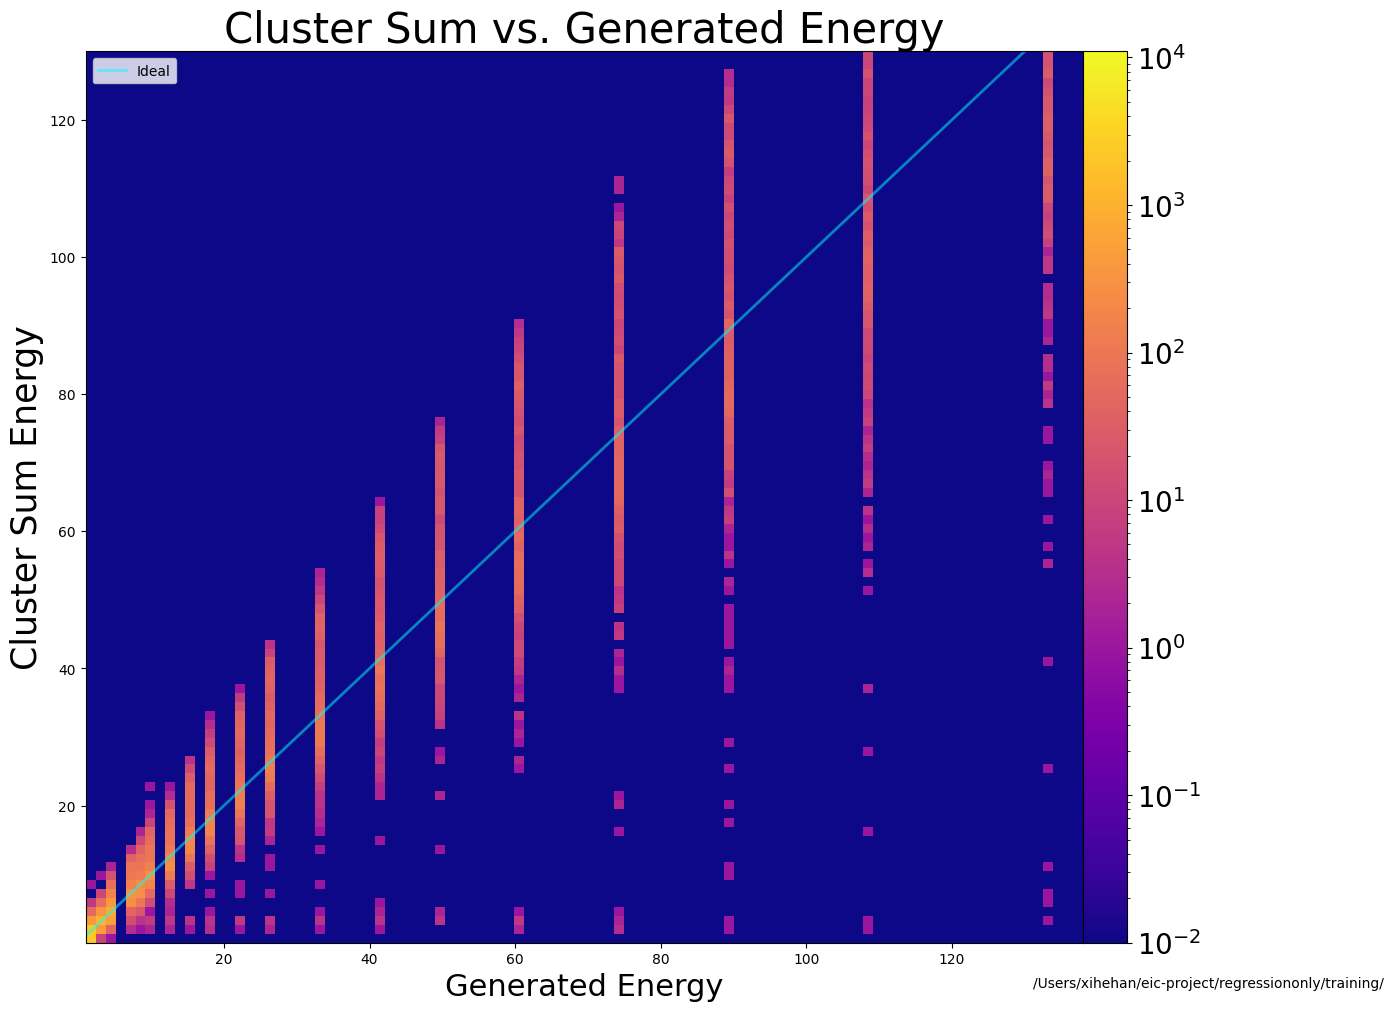

In [5]:
take_log_10 = False
ClusterSum_vs_GenP(ClusterSum, GenP, result_paths, take_log_10)

# Get resolution and energy scale

In [6]:
Energy_Bins = binning = np.linspace(0, 100, 21)
path = '/Users/xihehan/eic-project/regressiononly/training'
NN = get_res_scale(targets_ene,prediction_ene,Energy_Bins,path)
print(NN.keys())


dict_keys(['avg_truth', 'resolution', 'median_scale', 'avg_scale', 'slices', 'scale_array'])


/Users/xihehan/eic-project/regressiononly/functions/data_functions.py:71: RuntimeWarning: invalid value encountered in divide
  avg_truth = avg_truth/counter
/Users/xihehan/anaconda3/envs/bhcal/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/xihehan/eic-project/regressiononly/functions/data_functions.py:76: RuntimeWarning: Mean of empty slice
  avg_scale  =   np.nanmean(scale_array,axis=-1)
/Users/xihehan/anaconda3/envs/bhcal/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


In [7]:
name_tag='ds21_'
particle_detector='pp_ecal+hcal'
print_parameter(NN['avg_truth'], name_tag+'energy',particle_detector)
print_parameter(NN['resolution'], name_tag+'res_std_median',particle_detector)
print_parameter(NN['median_scale'], name_tag+'scale_median',particle_detector)

ds21_energy_pp_ecal+hcal=np. array([  2.13664 ,   6.674465,  11.390835,  16.656372,  22.000002,
        27.000003,  33.      ,        nan,  41.000004,  49.999996,
        50.000008,        nan,  60.000004,        nan,  74.      ,
              nan,        nan,  89.999992,  90.000015,        nan,
       120.869072])
ds21_res_std_median_pp_ecal+hcal=np. array([0.638369, 0.359267, 0.294617, 0.264913, 0.238393, 0.233709,
       0.225576,      nan, 0.22665 , 0.216196, 0.224026,      nan,
       0.221163,      nan, 0.210865,      nan,      nan, 0.19604 ,
       0.157799,      nan, 0.217799])
ds21_scale_median_pp_ecal+hcal=np. array([1.044348, 1.011611, 1.015762, 1.01511 , 1.015133, 1.01716 ,
       0.998097,      nan, 0.988272, 0.979205, 1.04551 ,      nan,
       0.983931,      nan, 0.973143,      nan,      nan, 0.952656,
       1.00952 ,      nan, 0.943093])


[0.2153634367745222, 0.1624828531335266, 0.17504769306228796, 0.15882690719673295]


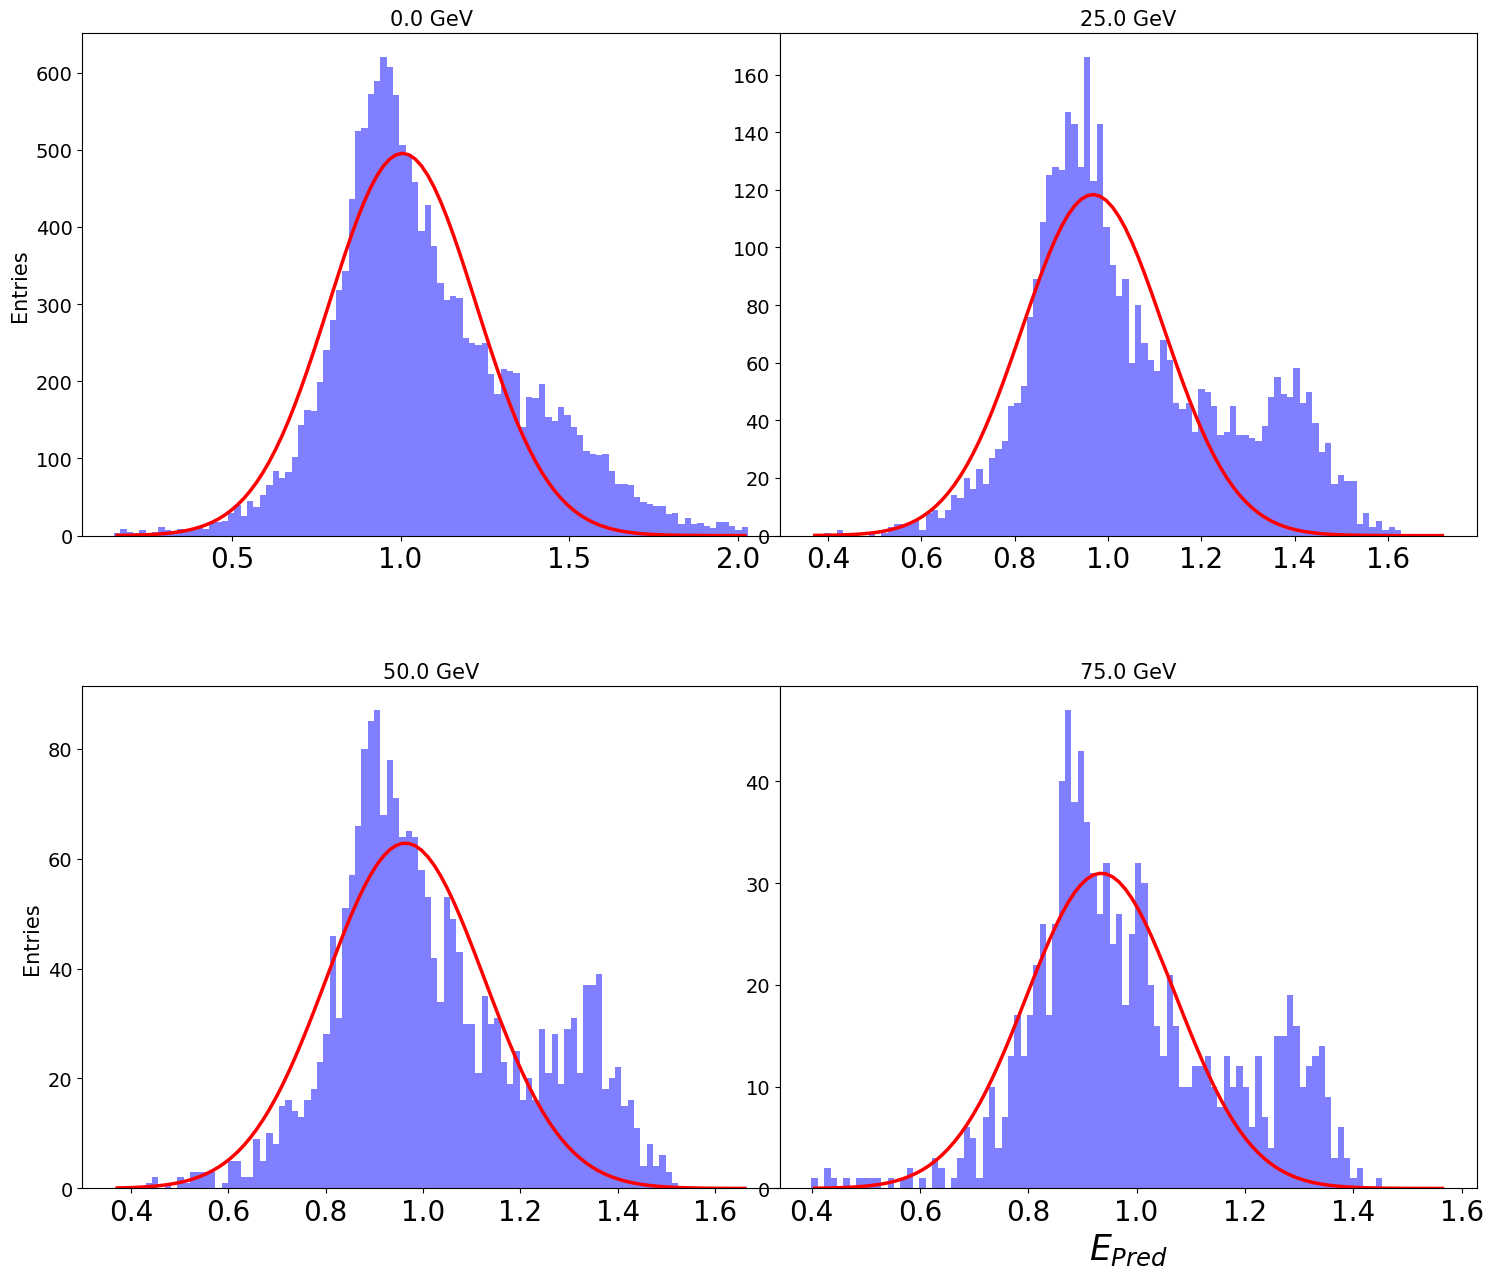

In [8]:
nbins = 100
output_path = path
min_val = 0
max_val = 100
Nbins = 5
data_type = '4D'
particle = 'pp'
binning=np.linspace(min_val, max_val, Nbins)
resolution_arr,scale_arr,avg_truth_arr,slices_arr,slices_red_truth_arr =get_res_scale_fit_log10_log2(targets_ene,prediction_ene, binning, nbins, \
data_type, particle)

print(resolution_arr)

# Plot of ratio of $E_{\text{truth}}$ versus $E_{\text{pred}}$

In [9]:
bin_label = 'truth'
ymin = 0.4
ymax = 1.5
fig=plt.figure(figsize=(14,10))

<Figure size 1400x1000 with 0 Axes>

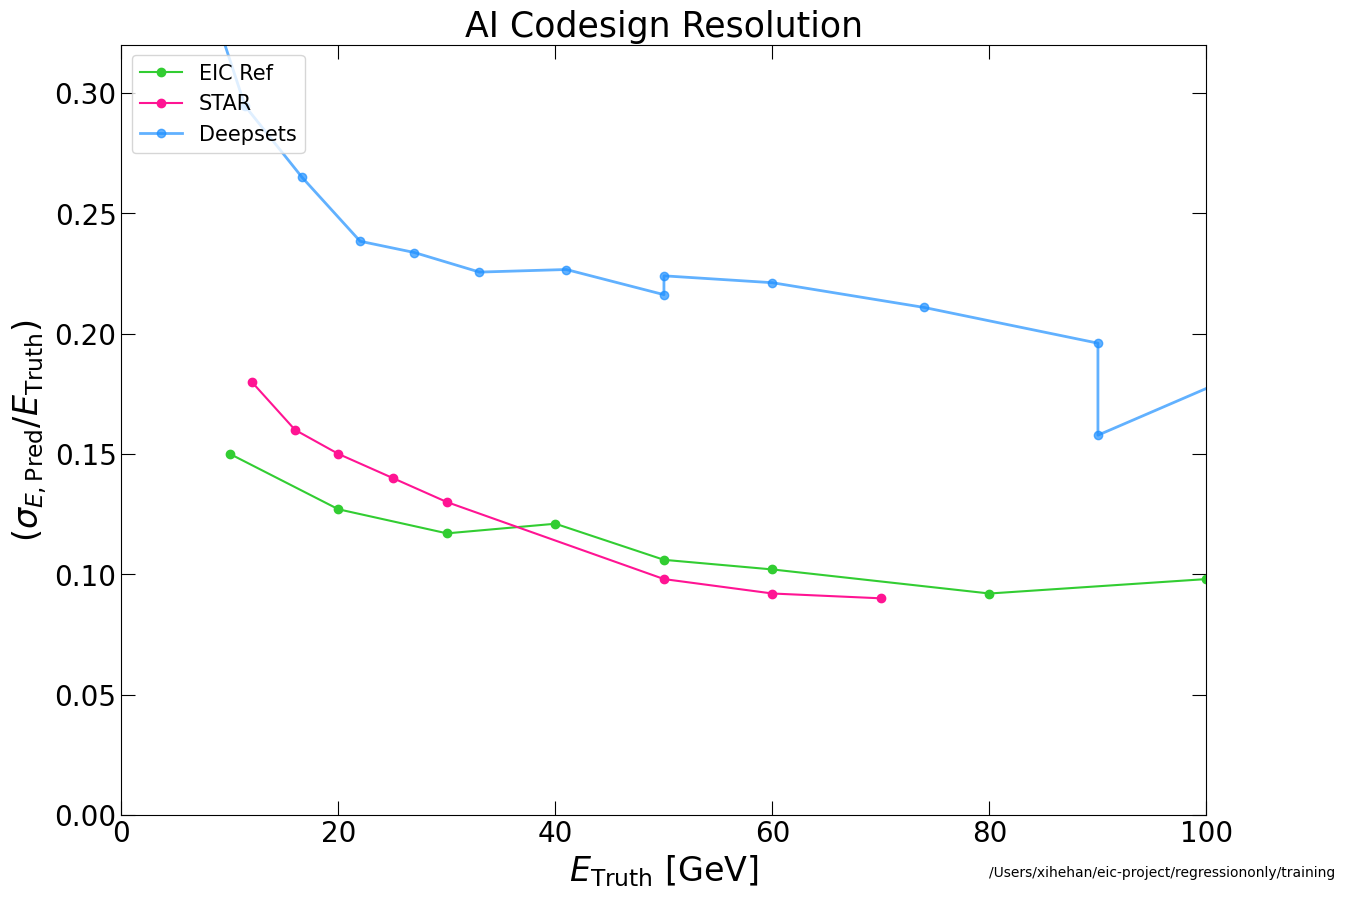

In [10]:
Plot_Resolutions(NN,0,path)

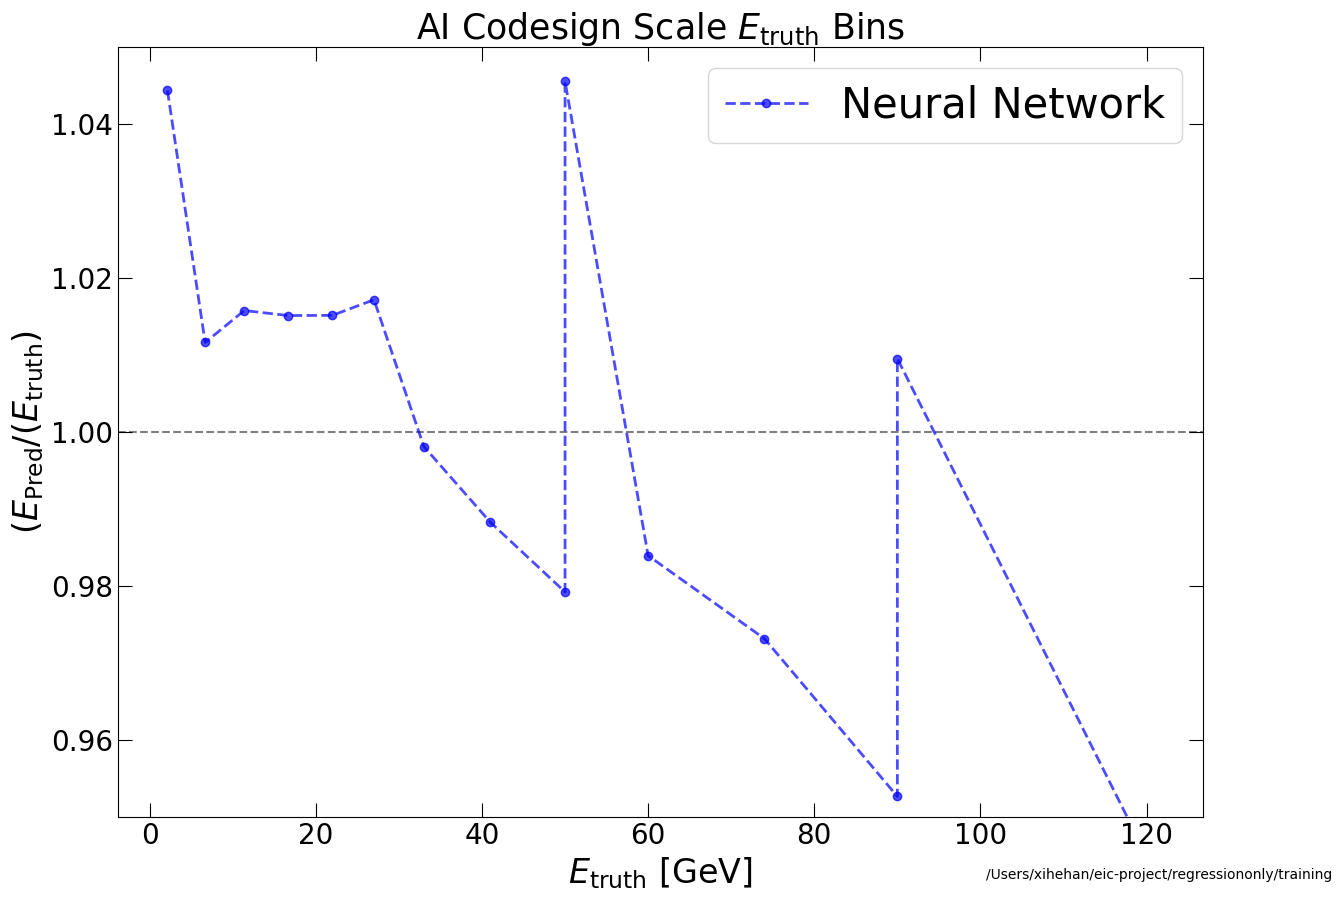

In [11]:
Plot_Energy_Scale(NN,path,1)